In [2]:
import pandas as pd
df = pd.read_csv("df_smogn.csv")

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def graficar_gradiente(
    c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10,
    intercepto, duracion, num_points=1000
):
    coef = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
    x = np.linspace(0, duracion, num_points)

    # Evaluar la función
    y = sum(coef[i] * x**i for i in range(11)) + intercepto

    # Reflejo vertical
    centro = (np.min(y) + np.max(y)) / 2
    y_complementaria = -y + 2 * centro

    # Normalizar ambas a [0, 1]
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    y_complementaria_norm = (y_complementaria - np.min(y_complementaria)) / (np.max(y_complementaria) - np.min(y_complementaria))

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(x, y_norm, label="eluyente1", color='blue')
    plt.plot(x, y_complementaria_norm, label="eluyente2", color='red', linestyle='--')
    plt.title("gradiente")
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.legend()
    plt.show()


In [14]:
df.iloc[0]

Clase                  Steroids and steroid derivatives (CHEMONTID:00...
Eluyente1                                                 eluent.1.h2o 0
Eluyente2                                                eluent.2.meoh 0
pH1                                                             3.591084
pH2                                                             3.594815
USP Code                                              column.usp.code_L1
Longitud                                                       99.562319
Tamaño de Partícula                                             2.076366
Temperatura                                                     30.17453
Flujo                                                           0.199818
T0                                                              1.111195
Score                                                           0.138348
x1                                                                   0.0
x2                                                 

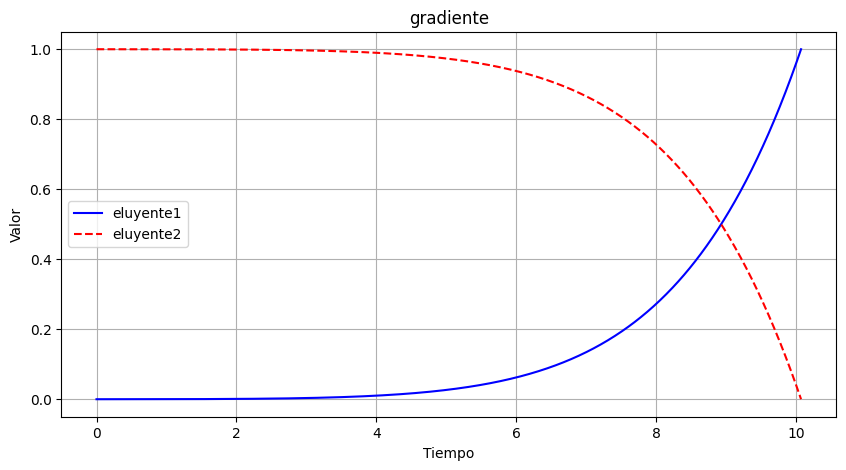

In [17]:
row = df.iloc[2]

graficar_gradiente(
    c0=0.0,
    c1=row['x1'],
    c2=row['x2'],
    c3=row['x3'],
    c4=row['x4'],
    c5=row['x5'],
    c6=row['x6'],
    c7=row['x7'],
    c8=row['x8'],
    c9=row['x9'],
    c10=row['x10'],
    intercepto=row['Intercepto'], 
    duracion=row['duration']
)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt
import os

def graficar_gradiente(
    c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10,
    intercepto, duracion, num_points=1000, save_path="grafico.png"
):
    coef = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
    x = np.linspace(0, duracion, num_points)

    y = sum(coef[i] * x**i for i in range(11)) + intercepto
    centro = (np.min(y) + np.max(y)) / 2
    y_complementaria = -y + 2 * centro

    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    y_complementaria_norm = (y_complementaria - np.min(y_complementaria)) / (np.max(y_complementaria) - np.min(y_complementaria))

    plt.figure(figsize=(10, 5))
    plt.plot(x, y_norm, label="eluyente1", color='blue')
    plt.plot(x, y_complementaria_norm, label="eluyente2", color='red', linestyle='--')
    plt.title("gradiente")
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

def agregar_diapositiva_con_grafico(prs, row, imagen='grafico.png'):
    slide = prs.slides.add_slide(prs.slide_layouts[5])

    # Título: Clase y Score
    titulo = f"Clase: {row['Clase']}\nScore: {row['Score']:.4f}"
    textbox = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(1))
    frame = textbox.text_frame
    p = frame.paragraphs[0]
    run = p.add_run()
    run.text = titulo
    run.font.size = Pt(20)
    run.font.bold = True

    # Imagen
    slide.shapes.add_picture(imagen, Inches(1), Inches(1.2), width=Inches(8))

    # Info adicional abajo
    info = ""
    for col in row.index:
        if col not in ['Clase', 'Score', 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','Intercepto','duration']:
            info += f"{col}: {row[col]}\n"

    textbox_info = slide.shapes.add_textbox(Inches(0.5), Inches(5.5), Inches(9), Inches(2))
    frame_info = textbox_info.text_frame
    frame_info.word_wrap = True
    p_info = frame_info.paragraphs[0]
    p_info.text = info
    p_info.font.size = Pt(12)



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt
import os
# --- Ejecución en todo el DataFrame ---
df = pd.read_csv("df_smogn.csv").sort_values('Score', ascending=False).groupby('Clase').head(3).reset_index(drop=True)

prs = Presentation()

for idx, row in df.iterrows():
    print(f"Procesando fila {idx + 1} de {len(df)}...")

    # Generar imagen para esta fila
    graficar_gradiente(
        c0=0.0,
        c1=row['x1'],
        c2=row['x2'],
        c3=row['x3'],
        c4=row['x4'],
        c5=row['x5'],
        c6=row['x6'],
        c7=row['x7'],
        c8=row['x8'],
        c9=row['x9'],
        c10=row['x10'],
        intercepto=row['Intercepto'], 
        duracion=row['duration'],
        save_path='grafico_temp.png'
    )

    agregar_diapositiva_con_grafico(prs, row, imagen='grafico_temp.png')

# Guardar el archivo final
prs.save('presentacion_completa.pptx')
os.remove('grafico_temp.png')  # limpiar imagen temporal
print("✅ Presentación creada: presentacion_completa.pptx")


Procesando fila 1 de 90...
Procesando fila 2 de 90...
Procesando fila 3 de 90...
Procesando fila 4 de 90...
Procesando fila 5 de 90...
Procesando fila 6 de 90...
Procesando fila 7 de 90...
Procesando fila 8 de 90...
Procesando fila 9 de 90...
Procesando fila 10 de 90...
Procesando fila 11 de 90...
Procesando fila 12 de 90...
Procesando fila 13 de 90...
Procesando fila 14 de 90...
Procesando fila 15 de 90...
Procesando fila 16 de 90...
Procesando fila 17 de 90...
Procesando fila 18 de 90...
Procesando fila 19 de 90...
Procesando fila 20 de 90...
Procesando fila 21 de 90...
Procesando fila 22 de 90...
Procesando fila 23 de 90...
Procesando fila 24 de 90...
Procesando fila 25 de 90...
Procesando fila 26 de 90...
Procesando fila 27 de 90...
Procesando fila 28 de 90...
Procesando fila 29 de 90...
Procesando fila 30 de 90...
Procesando fila 31 de 90...
Procesando fila 32 de 90...
Procesando fila 33 de 90...
Procesando fila 34 de 90...
Procesando fila 35 de 90...
Procesando fila 36 de 90...
P

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt
import os

#df = pd.read_csv("df_smogn.csv").sort_values(['Clase', 'Score'], ascending=[True, False]).groupby('Clase').head(3).reset_index(drop=True)
df = pd.read_csv("df_2.csv").sort_values(['Clase', 'Score'], ascending=[True, False]).groupby('Clase').head(3).reset_index(drop=True)

def graficar_gradiente(
    c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10,
    intercepto, duracion, num_points=1000, save_path="grafico.png"
):
    coef = np.array([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
    x = np.linspace(0, duracion, num_points)

    y = sum(coef[i] * x**i for i in range(11)) + intercepto
    centro = (np.min(y) + np.max(y)) / 2
    y_complementaria = -y + 2 * centro

    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    y_complementaria_norm = (y_complementaria - np.min(y_complementaria)) / (np.max(y_complementaria) - np.min(y_complementaria))

    plt.figure(figsize=(10, 5))
    plt.plot(x, y_norm, label="eluyente1", color='blue')
    plt.plot(x, y_complementaria_norm, label="eluyente2", color='red', linestyle='--')
    plt.title("gradiente")
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

def agregar_diapositiva_con_grafico(prs, row, imagen='grafico.png'):
    slide = prs.slides.add_slide(prs.slide_layouts[5])

    # Título: Clase y Score
    titulo = f"Clase: {row['Clase']}\nScore: {row['Score']:.4f}"
    textbox = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(1))
    frame = textbox.text_frame
    p = frame.paragraphs[0]
    run = p.add_run()
    run.text = titulo
    run.font.size = Pt(20)
    run.font.bold = True

    # Imagen
    slide.shapes.add_picture(imagen, Inches(1), Inches(1.2), width=Inches(8))

    # Info adicional abajo
    info = ""
    for col in row.index:
        if col not in ['Clase', 'Score', 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','Intercepto','duration']:
            info += f"{col}: {row[col]}\n"

    textbox_info = slide.shapes.add_textbox(Inches(0.5), Inches(5.5), Inches(9), Inches(2))
    frame_info = textbox_info.text_frame
    frame_info.word_wrap = True
    p_info = frame_info.paragraphs[0]
    p_info.text = info
    p_info.font.size = Pt(12)

# --- Ejecución en todo el DataFrame, procesando por 'Clase' ---
df = df.sort_values('Clase')  # Ordenar por la columna 'Clase'

prs = Presentation()

# Crear diapositivas por orden de clase
for clase, grupo in df.groupby('Clase'):
    print(f"Procesando clase: {clase}")
    
    # Para cada clase, procesamos los 3 mejores registros
    for idx, row in grupo.iterrows():
        print(f"  Procesando fila {idx + 1}...")
        
        # Generar imagen para esta fila
        graficar_gradiente(
            c0=0.0,
            c1=row['x1'],
            c2=row['x2'],
            c3=row['x3'],
            c4=row['x4'],
            c5=row['x5'],
            c6=row['x6'],
            c7=row['x7'],
            c8=row['x8'],
            c9=row['x9'],
            c10=row['x10'],
            intercepto=row['Intercepto'], 
            duracion=row['duration'],
            save_path='grafico_temp.png'
        )

        agregar_diapositiva_con_grafico(prs, row, imagen='grafico_temp.png')

# Guardar el archivo final
prs.save('presentacion_completa.pptx')
os.remove('grafico_temp.png')  # Limpiar imagen temporal
print("✅ Presentación creada: presentacion_completa.pptx")


Procesando clase: Azoles (CHEMONTID:0000436)
  Procesando fila 1...
  Procesando fila 2...
  Procesando fila 3...
Procesando clase: Benzene and substituted derivatives (CHEMONTID:0002279)
  Procesando fila 4...
  Procesando fila 5...
  Procesando fila 6...
Procesando clase: Carboxylic acids and derivatives (CHEMONTID:0000265)
  Procesando fila 7...
  Procesando fila 8...
  Procesando fila 9...
Procesando clase: Cinnamic acids and derivatives (CHEMONTID:0000476)
  Procesando fila 12...
  Procesando fila 11...
  Procesando fila 10...
Procesando clase: Coumarans (CHEMONTID:0004189)
  Procesando fila 13...
  Procesando fila 14...
  Procesando fila 15...
Procesando clase: Coumarins and derivatives (CHEMONTID:0000145)
  Procesando fila 16...
  Procesando fila 17...
  Procesando fila 18...
Procesando clase: Diazines (CHEMONTID:0001346)
  Procesando fila 19...
  Procesando fila 20...
  Procesando fila 21...
Procesando clase: Fatty Acyls (CHEMONTID:0003909)
  Procesando fila 24...
  Procesando 